In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns


destinations_df = pd.read_csv("Expanded_Destinations.csv")
reviews_df = pd.read_csv("Final_Updated_Expanded_Reviews.csv")
userhistory_df = pd.read_csv("Final_Updated_Expanded_UserHistory.csv")
users_df = pd.read_csv("Final_Updated_Expanded_Users.csv")

In [2]:
destinations_df.head()

DestinationID               Name              State        Type  \
0              1          Taj Mahal      Uttar Pradesh  Historical   
1              2        Goa Beaches                Goa       Beach   
2              3        Jaipur City          Rajasthan        City   
3              4  Kerala Backwaters             Kerala      Nature   
4              5         Leh Ladakh  Jammu and Kashmir   Adventure   

   Popularity BestTimeToVisit  
0    8.691906         Nov-Feb  
1    8.605032         Nov-Mar  
2    9.225372         Oct-Mar  
3    7.977386         Sep-Mar  
4    8.399822         Apr-Jun

In [3]:
reviews_df.head()

ReviewID  DestinationID  UserID  Rating            ReviewText
0         1            178     327       2  Incredible monument!
1         2            411     783       1    Loved the beaches!
2         3            927      12       2   A historical wonder
3         4            358     959       3  Incredible monument!
4         5            989     353       2    Loved the beaches!

In [4]:
userhistory_df.head()

HistoryID  UserID  DestinationID   VisitDate  ExperienceRating
0          1     525            760  2024-01-01                 3
1          2     184            532  2024-02-15                 5
2          3     897            786  2024-03-20                 2
3          4     470            660  2024-01-01                 1
4          5     989            389  2024-02-15                 4

In [5]:
users_df.head()

UserID   Name              Email          Preferences  Gender  \
0       1  Kavya  kavya@example.com  Beaches, Historical  Female   
1       2  Rohan  rohan@example.com    Nature, Adventure    Male   
2       3  Kavya  kavya@example.com     City, Historical  Female   
3       4  Anika  anika@example.com  Beaches, Historical  Female   
4       5  Tanvi  tanvi@example.com    Nature, Adventure  Female   

   NumberOfAdults  NumberOfChildren  
0               1                 0  
1               2                 2  
2               2                 0  
3               1                 0  
4               2                 2

In [ ]:

reviews_destinations = pd.merge(reviews_df, destinations_df, on='DestinationID', how='inner')

reviews_destinations_userhistory = pd.merge(reviews_destinations, userhistory_df, on='UserID', how='inner')

df = pd.merge(reviews_destinations_userhistory, users_df, on='UserID', how='inner')

df

ReviewID  DestinationID_x  UserID  Rating            ReviewText  \
0           1              178     327       2  Incredible monument!   
1           2              411     783       1    Loved the beaches!   
2           4              358     959       3  Incredible monument!   
3           5              989     353       2    Loved the beaches!   
4           6              473     408       4   A historical wonder   
..        ...              ...     ...     ...                   ...   
988       991              701     850       3  Incredible monument!   
989       991              701     850       3  Incredible monument!   
990       995              231     346       5    Loved the beaches!   
991       995              231     346       5    Loved the beaches!   
992       997              823     858       5  Incredible monument!   

                Name_x          State        Type  Popularity BestTimeToVisit  \
0          Jaipur City      Rajasthan        City    8.544352         Oct-Mar   
1            Taj Mahal  Uttar Pradesh  Historical    8.284127         Nov-Feb   
2          Jaipur City      Rajasthan        City    7.738761         Oct-Mar   
3    Kerala Backwaters         Kerala      Nature    8.208088         Sep-Mar   
4          Jaipur City      Rajasthan        City    8.138558         Oct-Mar   
..                 ...            ...         ...         ...             ...   
988          Taj Mahal  Uttar Pradesh  Historical    8.814029         Nov-Feb   
989          Taj Mahal  Uttar Pradesh  Historical    8.814029         Nov-Feb   
990          Taj Mahal  Uttar Pradesh  Historical    7.788256         Nov-Feb   
991          Taj Mahal  Uttar Pradesh  Historical    7.788256         Nov-Feb   
992        Jaipur City      Rajasthan        City    8.501225         Oct-Mar   

     HistoryID  DestinationID_y   VisitDate  ExperienceRating  Name_y  \
0           79              175  2024-01-01                 3   Pooja   
1          834              894  2024-03-20                 2   Karan   
2          998              660  2024-02-15                 4  Ritvik   
3          202              894  2024-01-01                 5    Isha   
4          331              403  2024-01-01                 2  Ishaan   
..         ...              ...         ...               ...     ...   
988        138              131  2024-03-20                 1  Hitesh   
989        643              761  2024-01-01                 4  Hitesh   
990        454              113  2024-01-01                 2  Hitesh   
991        556              128  2024-01-01                 4  Hitesh   
992        423              250  2024-03-20                 3   Rohan   

                  Email          Preferences  Gender  NumberOfAdults  \
0     pooja@example.com     City, Historical  Female               1   
1     karan@example.com     City, Historical    Male               1   
2    ritvik@example.com    Nature, Adventure    Male               1   
3      isha@example.com    Nature, Adventure  Female               2   
4    ishaan@example.com     City, Historical    Male               2   
..                  ...                  ...     ...             ...   
988  hitesh@example.com  Beaches, Historical    Male               2   
989  hitesh@example.com  Beaches, Historical    Male               2   
990  hitesh@example.com  Beaches, Historical    Male               2   
991  hitesh@example.com  Beaches, Historical    Male               2   
992   rohan@example.com     City, Historical    Male               1   

     NumberOfChildren  
0                   1  
1                   1  
2                   1  
3                   0  
4                   0  
..                ...  
988                 0  
989                 0  
990                 2  
991                 2  
992                 2  

[993 rows x 20 columns]

In [7]:
df.drop_duplicates(inplace=True)
df.shape

(993, 20)

In [8]:
df.to_csv("final_df.csv",index=False)

C:\Users\Deepa\AppData\Local\Temp\ipykernel_26960\3841231242.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Popularity', y='Name', data=destinations_df.sort_values(by='Popularity', ascending=False), palette='viridis')


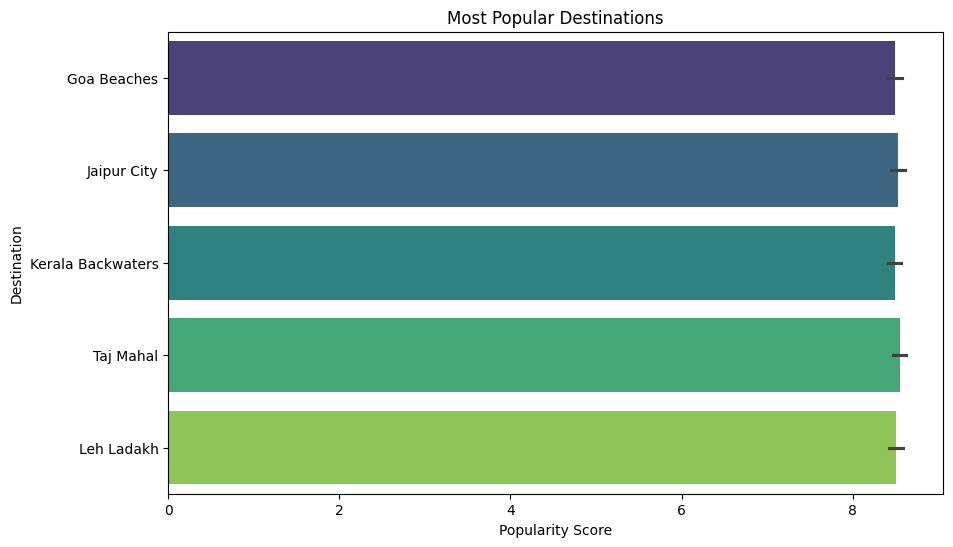

In [ ]:

plt.figure(figsize=(10, 6))
sns.barplot(x='Popularity', y='Name', data=destinations_df.sort_values(by='Popularity', ascending=False), palette='viridis')
plt.title('Most Popular Destinations')
plt.xlabel('Popularity Score')
plt.ylabel('Destination')
plt.show()

C:\Users\Deepa\AppData\Local\Temp\ipykernel_26960\3041409595.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Type', data=destinations_df, order=destinations_df['Type'].value_counts().index, palette='coolwarm')


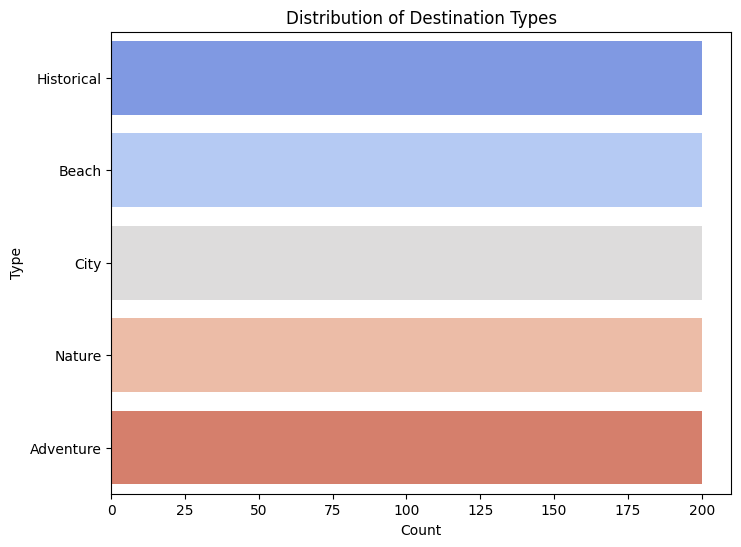

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(y='Type', data=destinations_df, order=destinations_df['Type'].value_counts().index, palette='coolwarm')
plt.title('Distribution of Destination Types')
plt.xlabel('Count')
plt.ylabel('Type')
plt.show()

C:\Users\Deepa\AppData\Local\Temp\ipykernel_26960\3398856787.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='BestTimeToVisit', data=destinations_df, order=destinations_df['BestTimeToVisit'].value_counts().index, palette='mako')


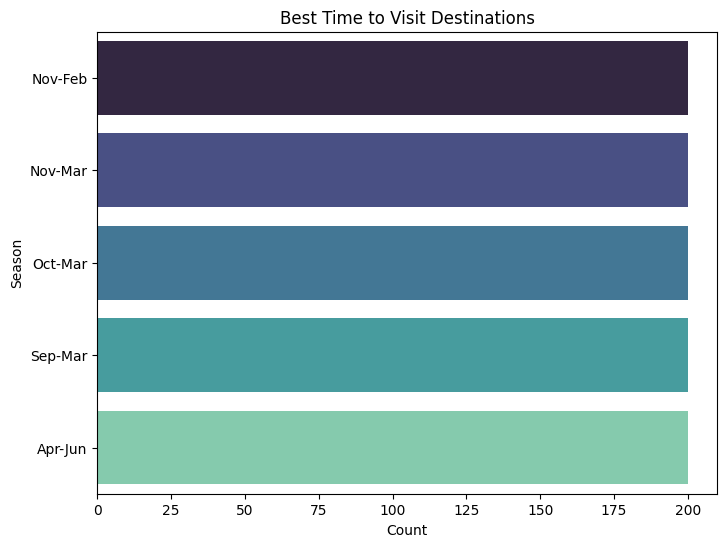

In [ ]:

plt.figure(figsize=(8, 6))
sns.countplot(y='BestTimeToVisit', data=destinations_df, order=destinations_df['BestTimeToVisit'].value_counts().index, palette='mako')
plt.title('Best Time to Visit Destinations')
plt.xlabel('Count')
plt.ylabel('Season')
plt.show()

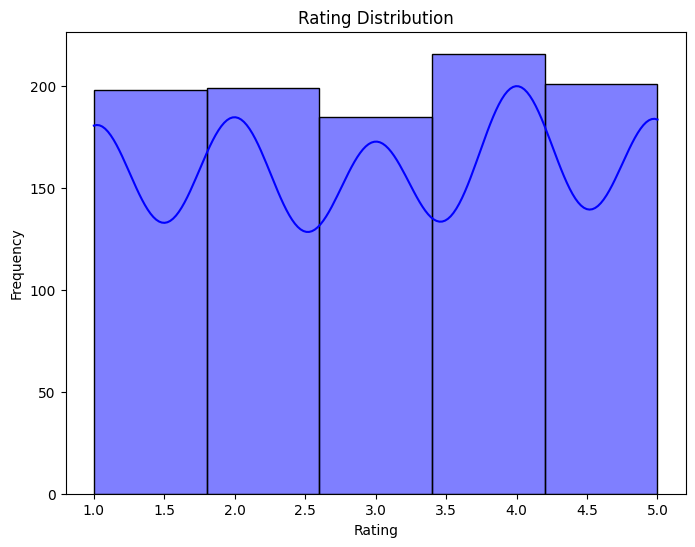

In [ ]:

plt.figure(figsize=(8, 6))
sns.histplot(reviews_df['Rating'], bins=5, kde=True, color='blue')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [13]:

df['features'] = df['Type'] + ' ' + df['State'] + ' ' + df['BestTimeToVisit'] + " " + df['Preferences']

vectorizer = TfidfVectorizer(stop_words='english')
destination_features = vectorizer.fit_transform(df['features'])

cosine_sim = cosine_similarity(destination_features, destination_features)

In [ ]:

def recommend_destinations(user_id, userhistory_df, destinations_df, cosine_sim):
   
    visited_destinations = userhistory_df[userhistory_df['UserID'] == user_id]['DestinationID'].values
    
    similar_scores = np.sum(cosine_sim[visited_destinations - 1], axis=0)
    
    recommended_destinations_idx = np.argsort(similar_scores)[::-1]
    
    recommendations = []
    for idx in recommended_destinations_idx:
        if destinations_df.iloc[idx]['DestinationID'] not in visited_destinations:
            recommendations.append(destinations_df.iloc[idx][[
                'DestinationID', 'Name', 'State', 'Type', 'Popularity', 'BestTimeToVisit'
            ]].to_dict())
        if len(recommendations) >= 5:
            break
    
    return pd.DataFrame(recommendations)

recommended_destinations = recommend_destinations(1, userhistory_df, destinations_df, cosine_sim)

recommended_destinations

DestinationID               Name              State        Type  \
0             99  Kerala Backwaters             Kerala      Nature   
1             81          Taj Mahal      Uttar Pradesh  Historical   
2             69  Kerala Backwaters             Kerala      Nature   
3            165         Leh Ladakh  Jammu and Kashmir   Adventure   
4            481          Taj Mahal      Uttar Pradesh  Historical   

   Popularity BestTimeToVisit  
0    8.154277         Sep-Mar  
1    8.113730         Nov-Feb  
2    9.251450         Sep-Mar  
3    7.554650         Apr-Jun  
4    8.347502         Nov-Feb

In [ ]:

recommended_destinations = recommend_destinations(10, userhistory_df, destinations_df, cosine_sim)


recommended_destinations

DestinationID               Name          State        Type  Popularity  \
0            993        Jaipur City      Rajasthan        City    8.195155   
1            326          Taj Mahal  Uttar Pradesh  Historical    8.206422   
2            339  Kerala Backwaters         Kerala      Nature    8.568613   
3            338        Jaipur City      Rajasthan        City    8.139655   
4            337        Goa Beaches            Goa       Beach    8.576363   

  BestTimeToVisit  
0         Oct-Mar  
1         Nov-Feb  
2         Sep-Mar  
3         Oct-Mar  
4         Nov-Mar

In [ ]:

recommended_destinations = recommend_destinations(50, userhistory_df, destinations_df, cosine_sim)

recommended_destinations

DestinationID         Name              State        Type  Popularity  \
0             98  Jaipur City          Rajasthan        City    7.511446   
1            831    Taj Mahal      Uttar Pradesh  Historical    8.771962   
2            956    Taj Mahal      Uttar Pradesh  Historical    9.240773   
3             42  Goa Beaches                Goa       Beach    8.854828   
4            110   Leh Ladakh  Jammu and Kashmir   Adventure    8.885980   

  BestTimeToVisit  
0         Oct-Mar  
1         Nov-Feb  
2         Nov-Feb  
3         Nov-Mar  
4         Apr-Jun

In [17]:

user_item_matrix = userhistory_df.pivot(index='UserID', columns='DestinationID', values='ExperienceRating')

user_item_matrix.fillna(0, inplace=True)

user_similarity = cosine_similarity(user_item_matrix)

In [ ]:

def collaborative_recommend(user_id, user_similarity, user_item_matrix, destinations_df):
    """
    Recommends destinations based on collaborative filtering.

    Args:
    - user_id: ID of the user for whom recommendations are to be made.
    - user_similarity: Cosine similarity matrix for users.
    - user_item_matrix: User-item interaction matrix (e.g., ratings or preferences).
    - destinations_df: DataFrame containing destination details.

    Returns:
    - DataFrame with recommended destinations and their details.
    """
    similar_users = user_similarity[user_id - 1]
    
    similar_users_idx = np.argsort(similar_users)[::-1][1:6]
    
    similar_user_ratings = user_item_matrix.iloc[similar_users_idx].mean(axis=0)
    
    recommended_destinations_ids = similar_user_ratings.sort_values(ascending=False).head(5).index
    
    recommendations = destinations_df[destinations_df['DestinationID'].isin(recommended_destinations_ids)][[
        'DestinationID', 'Name', 'State', 'Type', 'Popularity', 'BestTimeToVisit'
    ]]
    
    return recommendations

collaborative_recommendations = collaborative_recommend(1, user_similarity, user_item_matrix, destinations_df)

collaborative_recommendations


DestinationID               Name              State        Type  \
335            336          Taj Mahal      Uttar Pradesh  Historical   
519            520         Leh Ladakh  Jammu and Kashmir   Adventure   
684            685         Leh Ladakh  Jammu and Kashmir   Adventure   
784            785         Leh Ladakh  Jammu and Kashmir   Adventure   
878            879  Kerala Backwaters             Kerala      Nature   

     Popularity BestTimeToVisit  
335    9.268792         Nov-Feb  
519    8.521876         Apr-Jun  
684    7.598827         Apr-Jun  
784    9.366933         Apr-Jun  
878    8.309631         Sep-Mar

In [ ]:

collaborative_recommendations = collaborative_recommend(11, user_similarity, user_item_matrix, destinations_df)

collaborative_recommendations

DestinationID         Name              State        Type  Popularity  \
5                6    Taj Mahal      Uttar Pradesh  Historical    7.648950   
367            368  Jaipur City          Rajasthan        City    8.008252   
519            520   Leh Ladakh  Jammu and Kashmir   Adventure    8.521876   
784            785   Leh Ladakh  Jammu and Kashmir   Adventure    9.366933   
969            970   Leh Ladakh  Jammu and Kashmir   Adventure    9.013101   

    BestTimeToVisit  
5           Nov-Feb  
367         Oct-Mar  
519         Apr-Jun  
784         Apr-Jun  
969         Apr-Jun

In [ ]:

collaborative_recommendations = collaborative_recommend(100, user_similarity, user_item_matrix, destinations_df)

collaborative_recommendations

DestinationID         Name              State        Type  Popularity  \
5                6    Taj Mahal      Uttar Pradesh  Historical    7.648950   
346            347  Goa Beaches                Goa       Beach    7.920960   
519            520   Leh Ladakh  Jammu and Kashmir   Adventure    8.521876   
684            685   Leh Ladakh  Jammu and Kashmir   Adventure    7.598827   
784            785   Leh Ladakh  Jammu and Kashmir   Adventure    9.366933   

    BestTimeToVisit  
5           Nov-Feb  
346         Nov-Mar  
519         Apr-Jun  
684         Apr-Jun  
784         Apr-Jun

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor  # Using regressor for continuous target
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv('final_df.csv')

In [ ]:

features = ['Name_x', 'State', 'Type', 'BestTimeToVisit', 'Preferences', 'Gender', 'NumberOfAdults', 'NumberOfChildren']
target = 'Popularity'  
label_encoders = {}
for col in features:
    if data[col].dtype == 'object':
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        label_encoders[col] = le

X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")


Mean Squared Error: 0.30
R² Score: 0.07


In [ ]:
import pandas as pd

def recommend_destinations(user_input, model, label_encoders, features, data):
    
    encoded_input = {}
    for feature in features:
        if feature in label_encoders:
            encoded_input[feature] = label_encoders[feature].transform([user_input[feature]])[0]
        else:
            encoded_input[feature] = user_input[feature]

    input_df = pd.DataFrame([encoded_input])

    predicted_popularity = model.predict(input_df)[0]

    return predicted_popularity


user_input = {
    'Name_x': 'Jaipur City',
    'Type': 'City',
    'State': 'Rajasthan',
    'BestTimeToVisit': 'Oct-Mar',  
    'Preferences': 'City, Historical',
    'Gender': 'Female',
    'NumberOfAdults': 2,
    'NumberOfChildren': 1,
}

predicted_popularity = recommend_destinations(user_input, model, label_encoders, features, data)

print(f"Predicted Popularity Score: {predicted_popularity:.2f}")

Predicted Popularity Score: 7.88


In [24]:
import pickle

pickle.dump(model, open("model.pkl",'wb'))
pickle.dump(label_encoders, open("label_encoders.pkl",'wb'))